In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Define column names (based on the spambase.names file from the dataset)
column_names = ["word_freq_make", "word_freq_address", "word_freq_all", "word_freq_3d",
                "word_freq_our", "word_freq_over", "word_freq_remove", "word_freq_internet",
                "word_freq_order", "word_freq_mail", "word_freq_receive", "word_freq_will",
                "word_freq_people", "word_freq_report", "word_freq_addresses", "word_freq_free",
                "word_freq_business", "word_freq_email", "word_freq_you", "word_freq_credit",
                "word_freq_your", "word_freq_font", "word_freq_000", "word_freq_money", "word_freq_hp",
                "word_freq_hpl", "word_freq_george", "word_freq_650", "word_freq_lab", "word_freq_labs",
                "word_freq_telnet", "word_freq_857", "word_freq_data", "word_freq_415", "word_freq_85",
                "word_freq_technology", "word_freq_1999", "word_freq_parts", "word_freq_pm", "word_freq_direct",
                "word_freq_cs", "word_freq_meeting", "word_freq_original", "word_freq_project", "word_freq_re",
                "word_freq_edu", "word_freq_table", "word_freq_conference", "char_freq_;", "char_freq_(",
                "char_freq_[", "char_freq_!", "char_freq_$", "char_freq_#", "capital_run_length_average",
                "capital_run_length_longest", "capital_run_length_total", "spam"]

# Load data
data = pd.read_csv('spambase.data', names=column_names)


In [11]:
# Check the class distribution
class_counts = data['spam'].value_counts()
print(class_counts)


0    2788
1    1813
Name: spam, dtype: int64


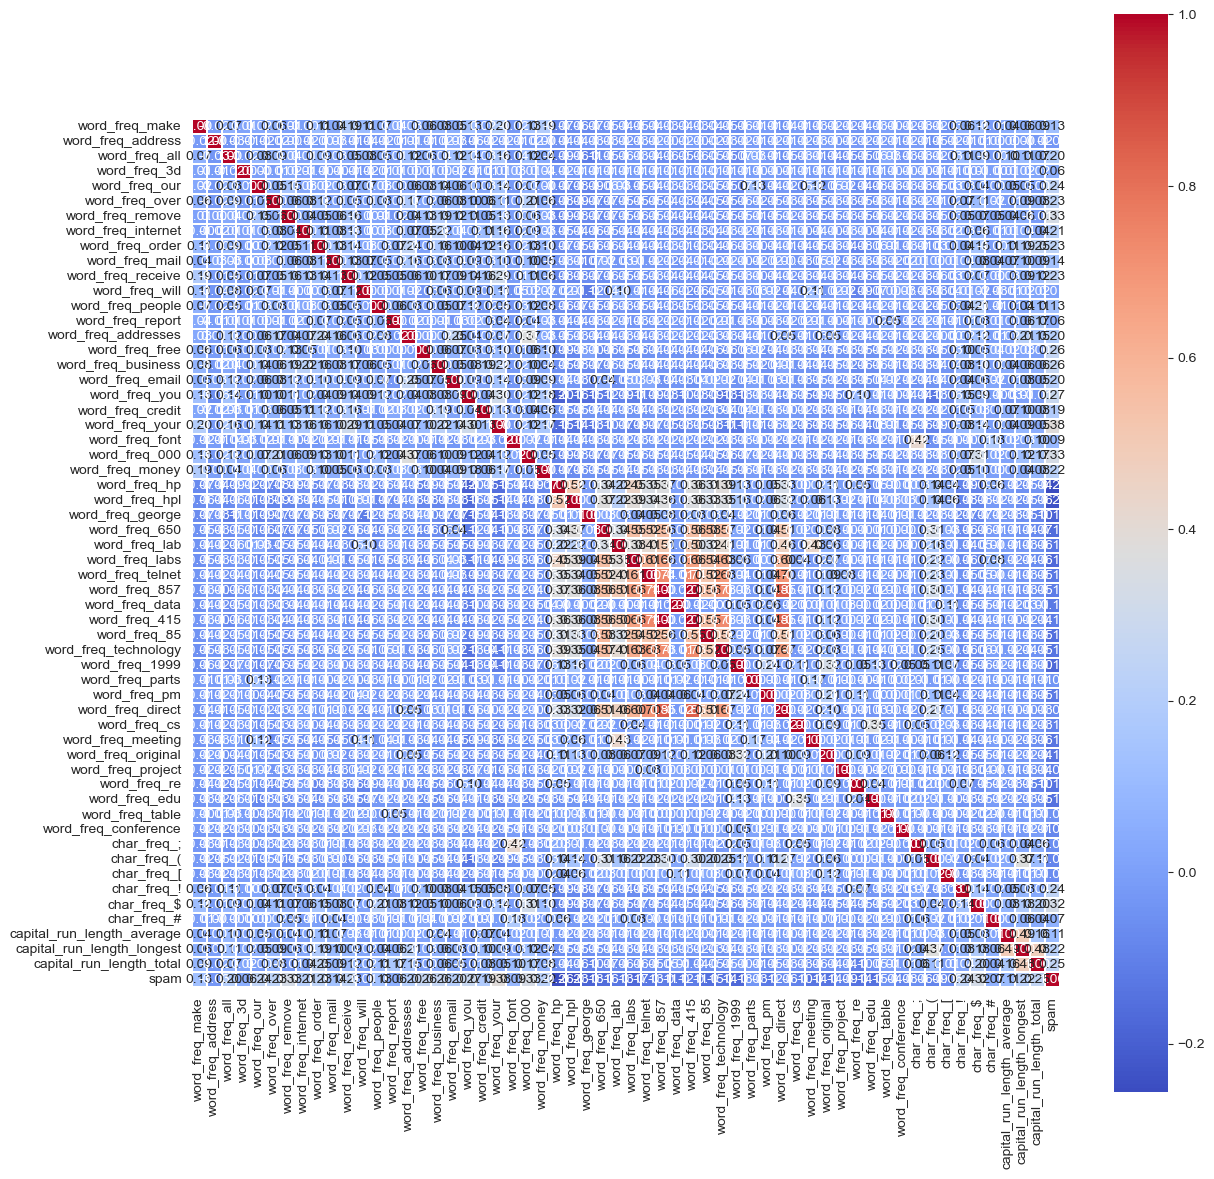

In [12]:
# Calculate correlations
corr = data.corr()

# Plot heatmap of correlations
plt.figure(figsize=(14, 14))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.01)
plt.show()


In [13]:
import numpy as np

# Calculate the correlation matrix
corr_matrix = data.corr()

# Create a mask to ignore the upper triangle and the diagonal of the correlation matrix
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Apply the mask to the correlation matrix
tri_df = corr_matrix.mask(mask)

# Stack the DataFrame and reset the index to get a long format
long_df = tri_df.stack().reset_index()

# Rename the columns for clarity
long_df.columns = ['Variable 1', 'Variable 2', 'Correlation']

# Calculate absolute value of Correlation for sorting
long_df['Abs Correlation'] = long_df['Correlation'].abs()

# Sort the DataFrame by 'Abs Correlation' and print the top 5
top_5_correlations = long_df.sort_values('Abs Correlation', ascending=False).head(5)

print(top_5_correlations)


           Variable 1        Variable 2  Correlation  Abs Correlation
559     word_freq_415     word_freq_857     0.996066         0.996066
772  word_freq_direct     word_freq_857     0.848021         0.848021
774  word_freq_direct     word_freq_415     0.845359         0.845359
495     word_freq_857  word_freq_telnet     0.737555         0.737555
558     word_freq_415  word_freq_telnet     0.735187         0.735187
